---
title: "Simple Logistic Regression Modeling"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-13"
categories: [python, datacamp, statistics, machine learning, linear regression, logistic regression]
image: "simpleLogisticRegressionModeling.jpg"

---

## Simple Logistic Regression Modeling

Get a better understanding of logistic regression models. We will analyze real-world data to predict the likelihood of a customer closing their bank account in terms of probabilities of success and odds ratios, and quantify the performance of your model using confusion matrices.

This **Simple Logistic Regression Modeling** is part of [Datacamp course: Introduction to Regression with statsmodels in Python](https://app.datacamp.com/learn/courses/introduction-to-regression-with-statsmodels-in-python)

This is my learning experience of data science through DataCamp

In [1]:
# Import numpy with alias np
import numpy as np
# Import seaborn with alias sns
import pandas as pd
import seaborn as sns
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
# Import the ols function
from statsmodels.formula.api import ols

## Logistic Regression

How would the response variable be affected if it were binary or logical? It can be Yes/No, 1/0, Blue/Red, etc.

For categorical responses, a logistic regression model is another type of generalized linear model.

An S curve is drawn to represent the response. Probabilities can be considered to be the fitted values between 0 and 1.

## Exploring the explanatory variables

In the case of a logical response variable, all points lie on the y=0 and y=1 lines, making it difficult to determine what is occurring. It was unclear how the explanatory variable was distributed on each line before you saw the trend line. A histogram of the explanatory variable, grouped by the response, can be used to resolve this problem.

These histograms will be used to gain an understanding of the financial services churn dataset

In [3]:
churn = pd.read_csv('dataset/churn.csv')
print(churn.head())

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


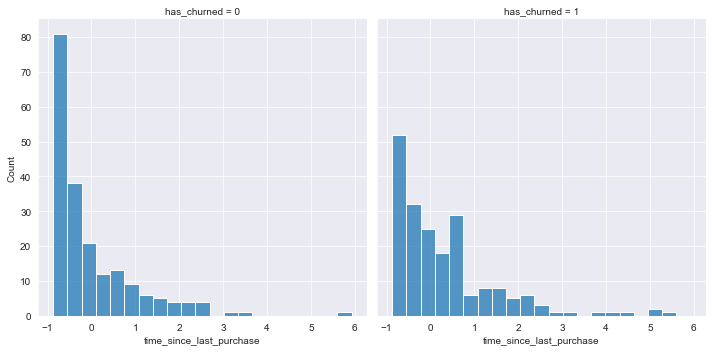

In [5]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn,x='time_since_last_purchase',col='has_churned')

plt.show()

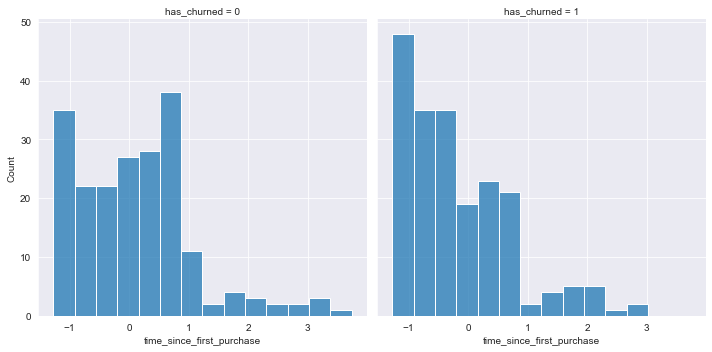

In [6]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn,x='time_since_first_purchase', col='has_churned')

plt.show()

C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\1505514929.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['time_since_last_purchase'])


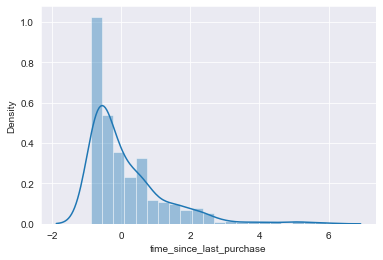

C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\1505514929.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist=False, rug=False)
C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\1505514929.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist=Fa

[0 1]


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

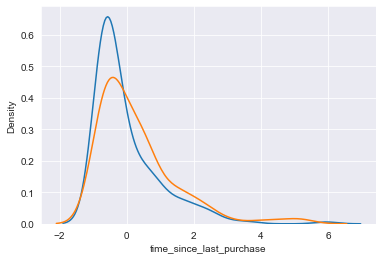

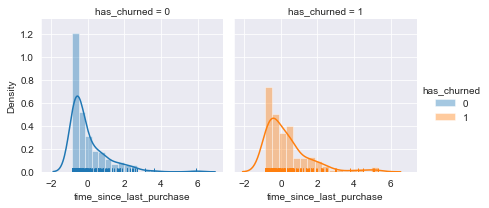

In [7]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.distplot(churn['time_since_last_purchase'])

# Show the plot
plt.show()

print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_last_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist=False, rug=False)

g = sns.FacetGrid(churn, col='has_churned', hue='has_churned')
p1 = g.map(sns.distplot, 'time_since_last_purchase', hist=True, rug=True).add_legend()

C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\3605684052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['time_since_first_purchase'])


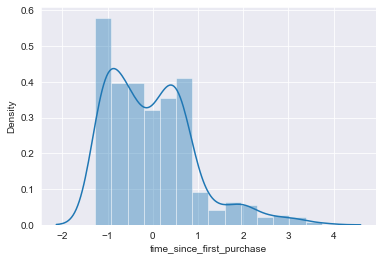

C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\3605684052.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist=False, rug=False)
C:\Users\dghr201\AppData\Local\Temp\ipykernel_29076\3605684052.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(values, hist=Fa

[0 1]


C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\dghr201\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

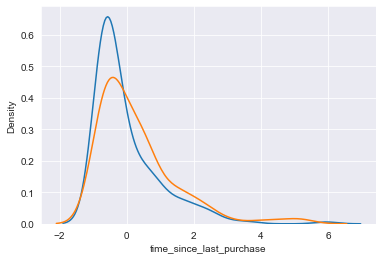

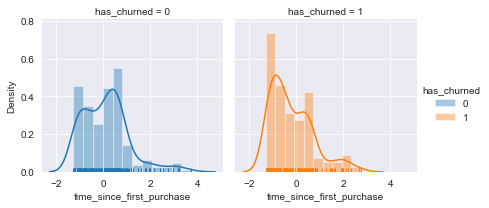

In [8]:
# Create the histograms of time_since_first_purchase split by has_churned
sns.distplot(churn['time_since_first_purchase'])

# Show the plot
plt.show()

print(churn['has_churned'].unique())

for x in churn['has_churned'].unique():
    values = churn.time_since_last_purchase[churn['has_churned'] == x]
    sns.distplot(values, hist=False, rug=False)

g = sns.FacetGrid(churn, col='has_churned', hue='has_churned')
p1 = g.map(sns.distplot, 'time_since_first_purchase', hist=True, rug=True).add_legend()



## Visualizing liner and logistic model

A logistic regression model can be drawn using regplot() in the same manner as a linear regression without you having to concern yourself with the modeling code. Try drawing both trend lines side by side to see how linear and logistic regressions make different predictions. From the linear model, you should see a linear trend (straight line), whereas from the logistic model, you should see a logistic trend (S-shaped).

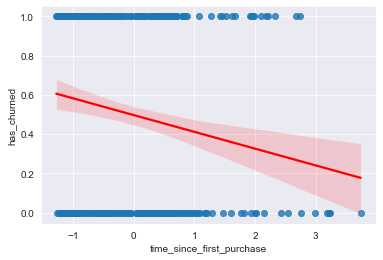

In [9]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn,x='time_since_first_purchase',y='has_churned'
            ,line_kws={"color": "red"})

plt.show()

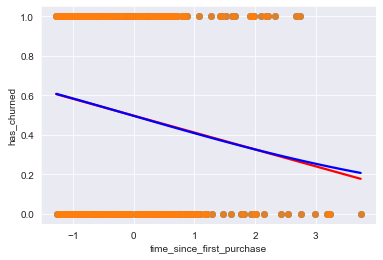


 The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.


In [11]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn,x='time_since_first_purchase', y='has_churned',ci=None,logistic=True,line_kws={"color": "blue"})

plt.show()

print("\n The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.")

## Logistic regression with logit()

Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

In [12]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


## Predictions and odds ratios

Odds ratios

Taking the probability that something will happen and dividing it by the probability that it will not happen. It is equal to (P/(1-P)). Probability in favor of / against. The data cannot be compared with the original data, but can instead be plotted using a special chart. This unit represents the probability of ... occurring (3 times the probability of...). It is easy to interpret, the data cannot be altered easily, and it is precise.

Log odds ratio

It is a nice property of odds ratios that they can be passed into a log() = linear regression. Data changes that are easy to interpret and precise.

Most likely Outcome

According to logistic regression, we discuss the rounded most likely outcome (response > 0.5 chance of churning, etc.) since response values can be interpreted as probabilities. This data is very easy to interpret, easy to change, and not precise (rounded).

Probability

Original data. Easy to interpret, not easy to change data on the fly, and precise.

Probabilities

We will examine each of the four main ways of expressing a logistic regression model's prediction in the following four exercises. Since the response variable is either "yes" or "no", you can predict the probability of a "yes". These probabilities will be calculated and visualized here.

In [13]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4, .35)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.15     0.596964
2                      -0.80     0.566762
3                      -0.45     0.536056
4                      -0.10     0.505074


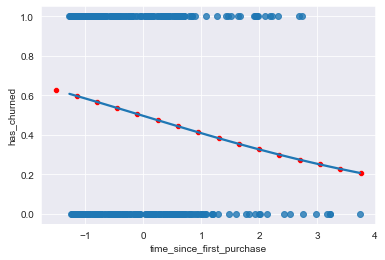

In [14]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase',y='has_churned',
data=prediction_data, color='red')

plt.show()

## Most likely outcome

A non-technical audience may appreciate you not discussing probabilities and simply explaining the most likely outcome. Thus, instead of stating that there is a 60% chance of a customer leaving, you state that churn is the most likely outcome. There is a trade-off here between easier interpretation and nuance.

In [15]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.15     0.596964                  1.0
2                      -0.80     0.566762                  1.0
3                      -0.45     0.536056                  1.0
4                      -0.10     0.505074                  1.0


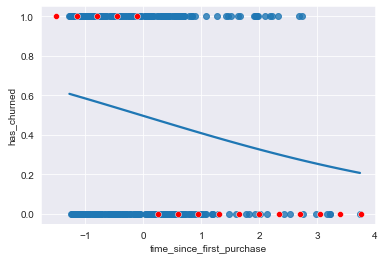


The most likely outcome is that you will master logistic regression! Providing the most likely response is a great way to share the model results with a non-technical audience.


In [17]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase', y='most_likely_outcome', data=prediction_data, color='red')

plt.show()
print("\nThe most likely outcome is that you will master logistic regression! Providing the most likely response is a great way to share the model results with a non-technical audience.")

## Odds ratio

An odds ratio is a measure of the probability of something occurring compared to the probability that it will not occur. Often, this is easier to understand than probabilities, particularly when making decisions regarding choices. If, for example, a customer has a 20% chance of churning, it may be more intuitive to state "the chances of them not churning are four times higher than the chances of them churning.".

In [18]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] =  prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.15     0.596964                  1.0    1.481166
2                      -0.80     0.566762                  1.0    1.308199
3                      -0.45     0.536056                  1.0    1.155431
4                      -0.10     0.505074                  1.0    1.020502


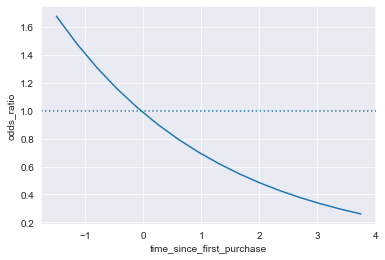


Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses


In [20]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio',data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

print("\nOdds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses")

## Log odds ratio

The disadvantage of probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. It is therefore difficult to understand what happens to the prediction when the explanatory variable is changed. The logarithm of the odds ratio (the "log odds ratio" or "logit") does exhibit a linear relationship between predicted response and explanatory variable. As the explanatory variable changes, the response metric does not change significantly - only linearly.

For visualization purposes, it is usually better to plot the odds ratio and apply a log transformation to the y-axis scale since the actual values of log odds ratio are less intuitive than (linear) odds ratio.

In [21]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.15     0.596964                  1.0    1.481166   
2                      -0.80     0.566762                  1.0    1.308199   
3                      -0.45     0.536056                  1.0    1.155431   
4                      -0.10     0.505074                  1.0    1.020502   

   log_odds_ratio  
0        0.517008  
1        0.392830  
2        0.268651  
3        0.144473  
4        0.020295  


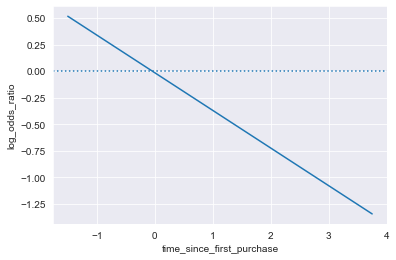


The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.


In [23]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()
print("\nThe linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.")

##
Quantifying logistic regression fit

Resid plot, QQplot & Scale location plot are less useful in the case of logistic regression. Instead, we can use confusion matrices to analyze the fit performance. With True/False positive & negative outcomes. We can also compute metrics based on various ratios.

    Accuracy : proportion of correct predictions. Higher better.

TN+TP / (TN+FN+FP+TP)

    Sensitivity : proportions of observations where the actual response was true and where the model also predicted it was true. Higher better.

TP / (FN + TP)

    Specificity : proportions of observations where the actual was false and where the model also predicted it was false. Higher better.

TN / (TN + FP)
Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

    True positive: The customer churned and the model predicted they would.
    False positive: The customer didn't churn, but the model predicted they would.
    True negative: The customer didn't churn and the model predicted they wouldn't.
    False negative: The customer churned, but the model predicted they wouldn't.



In [24]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))


actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


In [25]:
conf_matrix = pd.crosstab(outcomes['actual_response'], outcomes['predicted_response'], rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted  0.0  1.0
Actual             
0          112   88
1           76  124


## Drawing a mosaic plot of the confusion matrix

While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

[[112.  88.]
 [ 76. 124.]]


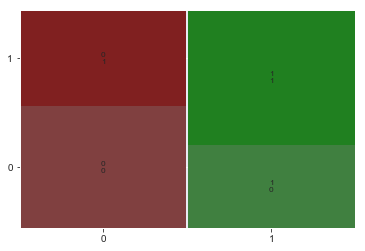

In [26]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance

As you know by now, several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity.

Accuracy is the proportion of predictions that are correct.

accuracy = (TN + TP) / TN + FN + FP + TP

Sensitivity is the proportion of true observations that are correctly predicted by the model as being true

sensitivity = TP / (TP + FN)

specificity is the proportion of false observations that are correctly predicted by the model as being false.

specificity = TN / (TN + FP)

In [27]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

print("\n Using these metrics, it becomes much easier to interpret and compare logistic regression models.")

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56

 Using these metrics, it becomes much easier to interpret and compare logistic regression models.
